In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from PIL import Image

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [30]:
model = Sequential([
    Reshape((28, 28), input_shape=(28, 28)),
    LSTM(128, return_sequences=True), Dropout(0.2),
    LSTM(128), Dropout(0.2),
    Dense(64, activation='relu'), Dropout(0.2),
    Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])

In [12]:
model.summary()
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)                  │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 28, 128)             │          80,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 28, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 220,874 (862.79 KB)

 Trainable params: 220,874 (862.79 KB)

 Non-trainable params: 0 (0.00 B)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 38ms/step - accuracy: 0.7499 - loss: 0.7439 - val_accuracy: 0.9647 - val_loss: 0.1112


In [20]:
model.save('mnist_lstm.keras')
model = load_model('mnist_lstm.keras')

C:\Users\DELL\tfenv310\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [26]:
def predict_number(input_data):
    if isinstance(input_data, str):
        img = image.load_img(input_data, target_size=(28, 28), color_mode='grayscale')
        img = np.array(img).astype('float32') / 255.0
    else:  
        img = input_data.astype('float32') / 255.0
    pred = model.predict(img.reshape(1, 28, 28))
    return np.argmax(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


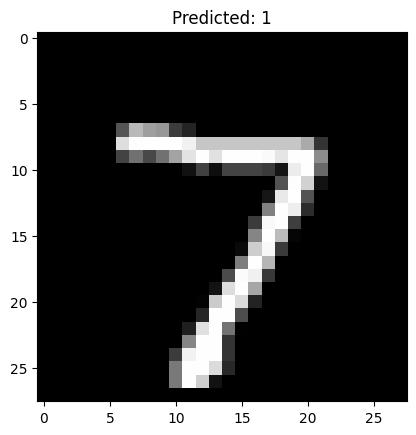

In [28]:
sample = X_test[0]
pred = predict_number(sample)
plt.imshow(sample, cmap='gray')
plt.title(f"Predicted: {pred}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


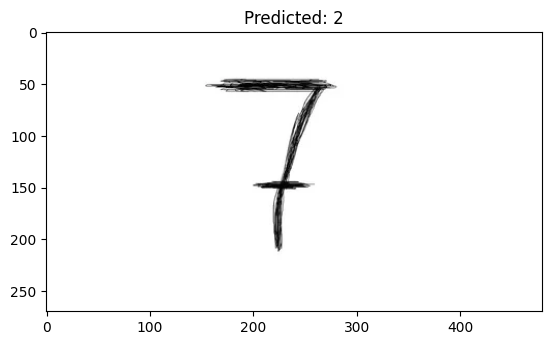

In [29]:
img_path = 'seven2.webp'
pred2 = predict_number(img_path)
plt.imshow(Image.open(img_path), cmap='gray')
plt.title(f"Predicted: {pred2}")
plt.show()

C:\Users\kulla\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 28, 128)             │          80,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 220,874 (862.79 KB)

 Trainable params: 220,874 (862.79 KB)

 Non-trainable params: 0 (0.00 B)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 136s 68ms/step - accuracy: 0.7630 - loss: 0.7088 - val_accuracy: 0.9679 - val_loss: 0.1004
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step


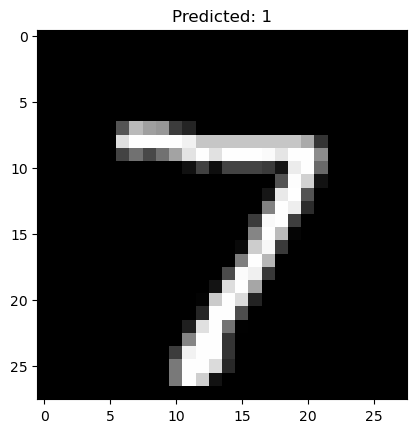

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


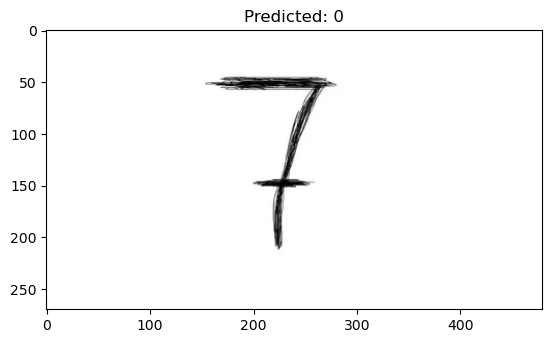

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from PIL import Image

# Load the MNIST dataset from a local file
with np.load(r"C:\Users\Downloads\mnist.npz\mnist.npz") as data:
    X_train = data['x_train']
    y_train = data['y_train']
    X_test = data['x_test']
    y_test = data['y_test']

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Define the LSTM model
model = Sequential([
    Reshape((28, 28), input_shape=(28, 28)),
    LSTM(128, return_sequences=True), Dropout(0.2),
    LSTM(128), Dropout(0.2),
    Dense(64, activation='relu'), Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])

model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test))

# Save and reload the model
model.save('mnist_lstm.keras')
model = load_model('mnist_lstm.keras')

# Function to predict number from numpy array or image file
def predict_number(input_data):
    if isinstance(input_data, str):
        img = image.load_img(input_data, target_size=(28, 28), color_mode='grayscale')
        img = np.array(img).astype('float32') / 255.0
    else:
        img = input_data.astype('float32') / 255.0
    pred = model.predict(img.reshape(1, 28, 28))
    return np.argmax(pred)

# Predict using a sample from X_test
sample = X_test[0]
pred = predict_number(sample)
plt.imshow(sample, cmap='gray')
plt.title(f"Predicted: {pred}")
plt.show()

# Predict using an external image file
img_path = r"C:\Users\Downloads\DL\DL\seven2.webp"
pred2 = predict_number(img_path)
plt.imshow(Image.open(img_path), cmap='gray')
plt.title(f"Predicted: {pred2}")
plt.show()
